In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

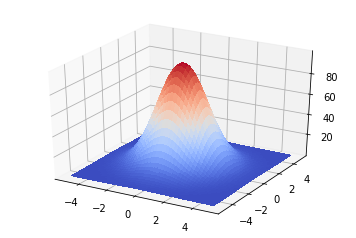

0.36787944117144233

In [2]:
X = np.linspace(-5,5)
Y = np.linspace(-5,5)
X, Y = np.meshgrid(X, Y)

Z = 100*np.exp(-1*(X**2 + Y**2)/5)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

X1 = X.reshape(-1,1)
Y1 = Y.reshape(-1,1)
Z1 = Z.reshape(-1,1)

np.exp(-1)

In [3]:
def plot3d(x, y, z):
    l = int(np.sqrt(x.shape[0]))
    x1 = x.reshape(l,l)
    y1 = y.reshape(l,l)
    z1 = z.reshape(l,l)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    plt.show()
   # ax.set_zlim(-1.01, 1.01)

    X1 = X.reshape(-1,1)
    Y1 = Y.reshape(-1,1)
    Z1 = Z.reshape(-1,1)

In [4]:
def model_fn(features, labels, mode, params={}):
    # b -- batch size
    X = features['X'] # b x 1
    Y = features['Y'] # b x 1
    
    # labels -- b x 1
    
    inputs = tf.concat([X,Y], axis = 1) # b x 2
    
    p = params.get("p", 1)
    #xavier = tf.contrib.layers.xavier_initializer(seed = 42)
    # Layer 1
    w = tf.get_variable("w", shape=[2, p], dtype=tf.float64) # 2 x p
    b = tf.get_variable("b", shape=[1, p], dtype=tf.float64) # 1 x p
    
    out1 = b + tf.matmul(inputs, w) # b x p
    # Hidden layer
    out2 = tf.nn.relu(out1) # b x p
    
    # Final transformation
    
    w_outer = tf.get_variable("w_outer", shape=[p, 1], dtype=tf.float64) # p x 1
    b_outer = tf.get_variable("b_outer", shape=[1, 1], dtype=tf.float64) # 1 x 1

    out3 = tf.matmul(out2, w_outer)  + b_outer# b x 1
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode = mode,
            predictions = out3,
            loss = None,
            train_op = None
        )
    
    loss = tf.losses.mean_squared_error(labels, out3)
    learning_rate = 1e-5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    global_step = tf.train.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = out3,
        loss = loss,
        train_op = train_op
    )

# Shape experiments trial

In [5]:
npa = np.array(range(1,5), dtype=np.float32).reshape(-1,1)
npb = npa + 2

a = tf.constant(npa)
b = tf.constant(npb)

tf.matmul(tf.transpose(a),b)

tf.concat([npa, npb],axis=1)

<tf.Tensor 'concat:0' shape=(4, 2) dtype=float32>

In [6]:
estimator = tf.estimator.Estimator(model_fn=model_fn, params={"p": 10})
input_fn = tf.estimator.inputs.numpy_input_fn({"X": X1, "Y":Y1}, y=Z1, batch_size=10, num_epochs=100, shuffle=True)
predict_input_fn = tf.estimator.inputs.numpy_input_fn({"X": X1, "Y":Y1}, y=Z1, batch_size=5, num_epochs=1, shuffle=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10bd12a10>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpgY6sXg', '_save_summary_steps': 100}


In [7]:
estimator.train(input_fn=input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpgY6sXg/model.ckpt.
INFO:tensorflow:loss = 13.263483, step = 1
INFO:tensorflow:global_step/sec: 946.727
INFO:tensorflow:loss = 64.4987, step = 101 (0.107 sec)
INFO:tensorflow:global_step/sec: 1057.94
INFO:tensorflow:loss = 100.69121, step = 201 (0.095 sec)
INFO:tensorflow:global_step/sec: 1053.41
INFO:tensorflow:loss = 1915.488, step = 301 (0.095 sec)
INFO:tensorflow:global_step/sec: 1033.68
INFO:tensorflow:loss = 657.7359, step = 401 (0.096 sec)
INFO:tensorflow:global_step/sec: 1043.5
INFO:tensorflow:loss = 135.33708, step = 501 (0.096 sec)
INFO:tensorflow:global_step/sec: 983.263
INFO:tensorflow:loss = 856.3325, step = 601 (0.101 sec)
INFO:tensorflow:global_step/sec: 1000.22
INFO:tensorflow:loss = 285.09143, step = 701 (0.100 sec)
INFO:tensorflow:global_step/sec: 972.622
INFO:tensorflow:loss = 1442.5587, step = 801 (0.103 sec)
INFO:tensorflow:gl

INFO:tensorflow:loss = 740.25476, step = 8201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1149.65
INFO:tensorflow:loss = 690.4496, step = 8301 (0.087 sec)
INFO:tensorflow:global_step/sec: 1216.22
INFO:tensorflow:loss = 1365.9241, step = 8401 (0.082 sec)
INFO:tensorflow:global_step/sec: 1267.88
INFO:tensorflow:loss = 635.7563, step = 8501 (0.079 sec)
INFO:tensorflow:global_step/sec: 1111.74
INFO:tensorflow:loss = 266.2981, step = 8601 (0.090 sec)
INFO:tensorflow:global_step/sec: 1227.1
INFO:tensorflow:loss = 104.24815, step = 8701 (0.081 sec)
INFO:tensorflow:global_step/sec: 1228.92
INFO:tensorflow:loss = 1216.9832, step = 8801 (0.082 sec)
INFO:tensorflow:global_step/sec: 1243.24
INFO:tensorflow:loss = 813.92865, step = 8901 (0.080 sec)
INFO:tensorflow:global_step/sec: 1243.38
INFO:tensorflow:loss = 171.65656, step = 9001 (0.080 sec)
INFO:tensorflow:global_step/sec: 1232.88
INFO:tensorflow:loss = 2434.0234, step = 9101 (0.081 sec)
INFO:tensorflow:global_step/sec: 1139.95
INFO:tensorflo

INFO:tensorflow:global_step/sec: 1207.51
INFO:tensorflow:loss = 143.25693, step = 16501 (0.082 sec)
INFO:tensorflow:global_step/sec: 1291.66
INFO:tensorflow:loss = 904.2487, step = 16601 (0.077 sec)
INFO:tensorflow:global_step/sec: 1345.28
INFO:tensorflow:loss = 992.28076, step = 16701 (0.075 sec)
INFO:tensorflow:global_step/sec: 1314.17
INFO:tensorflow:loss = 1410.8319, step = 16801 (0.076 sec)
INFO:tensorflow:global_step/sec: 1016.48
INFO:tensorflow:loss = 215.77505, step = 16901 (0.099 sec)
INFO:tensorflow:global_step/sec: 948.045
INFO:tensorflow:loss = 78.2151, step = 17001 (0.106 sec)
INFO:tensorflow:global_step/sec: 962.955
INFO:tensorflow:loss = 358.56955, step = 17101 (0.104 sec)
INFO:tensorflow:global_step/sec: 824.553
INFO:tensorflow:loss = 543.5743, step = 17201 (0.121 sec)
INFO:tensorflow:global_step/sec: 1206.71
INFO:tensorflow:loss = 821.3973, step = 17301 (0.082 sec)
INFO:tensorflow:global_step/sec: 1273.48
INFO:tensorflow:loss = 636.234, step = 17401 (0.078 sec)
INFO:te

INFO:tensorflow:loss = 442.6998, step = 24701 (0.077 sec)
INFO:tensorflow:global_step/sec: 1149.46
INFO:tensorflow:loss = 705.6986, step = 24801 (0.087 sec)
INFO:tensorflow:global_step/sec: 1246.79
INFO:tensorflow:loss = 278.37888, step = 24901 (0.080 sec)
INFO:tensorflow:Saving checkpoints for 25001 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpgY6sXg/model.ckpt.
INFO:tensorflow:Loss for final step: 96.35472.


In [8]:

predict2 = tf.estimator.inputs.numpy_input_fn({"X": np.array([0, 0, 0], dtype=np.float64).reshape(-1,1), "Y":np.array([0, 0, 0], dtype=np.float64).reshape(-1,1)}, y=np.array([0,0,0], dtype=np.float64).reshape(-1,1), batch_size=1, num_epochs=50, shuffle=True)

Zgen = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([i[0] for i in Zgen]).reshape(-1,1)
estimator.evaluate(input_fn=predict_input_fn)
#Zgen.next()

INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpgY6sXg/model.ckpt-25001
INFO:tensorflow:Starting evaluation at 2018-01-25-10:30:20
INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpgY6sXg/model.ckpt-25001
INFO:tensorflow:Finished evaluation at 2018-01-25-10:30:21
INFO:tensorflow:Saving dict for global step 25001: global_step = 25001, loss = 364.30206


{'global_step': 25001, 'loss': 364.30206}

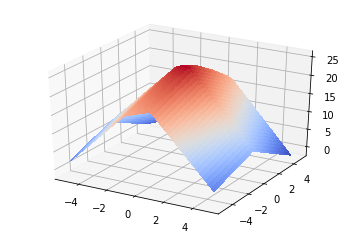

In [9]:
plot3d(X1, Y1, Zout)

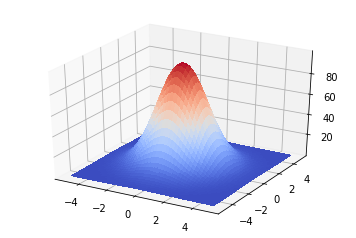

In [10]:
plot3d(X1, Y1, Z1)

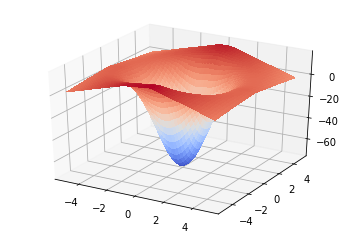

In [11]:
plot3d(X1, Y1, Zout-Z1)

# NN regression using dense layers

In [12]:
def model_fn_with_dense(features, labels, mode, params={}):
    p = params.get("p", 1)
    
    # b - batch size
    X = features['X'] # b x 1
    Y = features['Y'] # b x 1
    
    # labels -- b x 1
    
    inputs = tf.concat([X,Y], axis = 1) # b x 2
    
    out1 = tf.layers.dense(inputs=inputs, activation=tf.nn.relu, units=p)
    out2 = tf.layers.dense(inputs=out1, units=1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode = mode,
            predictions = out2,
            loss = None,
            train_op = None
        )
    loss = tf.losses.mean_squared_error(labels, out2)
    learning_rate = 1e-5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    global_step = tf.train.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = out2,
        loss = loss,
        train_op = train_op
    )

In [13]:
estimator = tf.estimator.Estimator(model_fn=model_fn_with_dense, params={"p": 10})

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1215c8d50>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmeqTAF', '_save_summary_steps': 100}


In [14]:
estimator.train(input_fn=input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmeqTAF/model.ckpt.
INFO:tensorflow:loss = 63.080147, step = 1
INFO:tensorflow:global_step/sec: 988.367
INFO:tensorflow:loss = 10.03953, step = 101 (0.104 sec)
INFO:tensorflow:global_step/sec: 1081.9
INFO:tensorflow:loss = 896.0023, step = 201 (0.092 sec)
INFO:tensorflow:global_step/sec: 1060.69
INFO:tensorflow:loss = 1736.675, step = 301 (0.093 sec)
INFO:tensorflow:global_step/sec: 1123.2
INFO:tensorflow:loss = 23.538046, step = 401 (0.089 sec)
INFO:tensorflow:global_step/sec: 1160.86
INFO:tensorflow:loss = 976.03577, step = 501 (0.086 sec)
INFO:tensorflow:global_step/sec: 899.654
INFO:tensorflow:loss = 874.36115, step = 601 (0.111 sec)
INFO:tensorflow:global_step/sec: 1093.04
INFO:tensorflow:loss = 50.858597, step = 701 (0.091 sec)
INFO:tensorflow:global_step/sec: 1106.38
INFO:tensorflow:loss = 1978.2028, step = 801 (0.091 sec)
INFO:tensorflow:g

INFO:tensorflow:loss = 45.37867, step = 8201 (0.080 sec)
INFO:tensorflow:global_step/sec: 1247.77
INFO:tensorflow:loss = 65.54629, step = 8301 (0.080 sec)
INFO:tensorflow:global_step/sec: 1229.16
INFO:tensorflow:loss = 1721.3096, step = 8401 (0.081 sec)
INFO:tensorflow:global_step/sec: 1267.85
INFO:tensorflow:loss = 864.33856, step = 8501 (0.079 sec)
INFO:tensorflow:global_step/sec: 1291.5
INFO:tensorflow:loss = 67.2819, step = 8601 (0.077 sec)
INFO:tensorflow:global_step/sec: 1201.52
INFO:tensorflow:loss = 182.64415, step = 8701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1227.85
INFO:tensorflow:loss = 384.35245, step = 8801 (0.082 sec)
INFO:tensorflow:global_step/sec: 1256.3
INFO:tensorflow:loss = 330.3006, step = 8901 (0.079 sec)
INFO:tensorflow:global_step/sec: 1202.66
INFO:tensorflow:loss = 199.42976, step = 9001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1255.89
INFO:tensorflow:loss = 82.05133, step = 9101 (0.080 sec)
INFO:tensorflow:global_step/sec: 1209.19
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 1151.93
INFO:tensorflow:loss = 105.00725, step = 16501 (0.087 sec)
INFO:tensorflow:global_step/sec: 1227.84
INFO:tensorflow:loss = 121.17944, step = 16601 (0.081 sec)
INFO:tensorflow:global_step/sec: 1187.97
INFO:tensorflow:loss = 90.825516, step = 16701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1249.87
INFO:tensorflow:loss = 1139.9094, step = 16801 (0.080 sec)
INFO:tensorflow:global_step/sec: 1062.46
INFO:tensorflow:loss = 126.55437, step = 16901 (0.094 sec)
INFO:tensorflow:global_step/sec: 1119.79
INFO:tensorflow:loss = 168.33797, step = 17001 (0.089 sec)
INFO:tensorflow:global_step/sec: 1212.27
INFO:tensorflow:loss = 108.39998, step = 17101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1155.76
INFO:tensorflow:loss = 86.47562, step = 17201 (0.087 sec)
INFO:tensorflow:global_step/sec: 1176.79
INFO:tensorflow:loss = 288.38885, step = 17301 (0.085 sec)
INFO:tensorflow:global_step/sec: 1173.67
INFO:tensorflow:loss = 1259.3057, step = 17401 (0.085 sec)
I

INFO:tensorflow:global_step/sec: 1235.02
INFO:tensorflow:loss = 575.59424, step = 24801 (0.081 sec)
INFO:tensorflow:global_step/sec: 1200.94
INFO:tensorflow:loss = 12.492269, step = 24901 (0.083 sec)
INFO:tensorflow:global_step/sec: 1268.78
INFO:tensorflow:loss = 307.53436, step = 25001 (0.079 sec)
INFO:tensorflow:global_step/sec: 1279.02
INFO:tensorflow:loss = 101.79057, step = 25101 (0.078 sec)
INFO:tensorflow:global_step/sec: 1220.57
INFO:tensorflow:loss = 815.95276, step = 25201 (0.082 sec)
INFO:tensorflow:global_step/sec: 1235.94
INFO:tensorflow:loss = 261.40738, step = 25301 (0.081 sec)
INFO:tensorflow:global_step/sec: 1316
INFO:tensorflow:loss = 251.25533, step = 25401 (0.076 sec)
INFO:tensorflow:global_step/sec: 1286.97
INFO:tensorflow:loss = 107.80817, step = 25501 (0.078 sec)
INFO:tensorflow:global_step/sec: 1271.46
INFO:tensorflow:loss = 52.25705, step = 25601 (0.079 sec)
INFO:tensorflow:global_step/sec: 1216.38
INFO:tensorflow:loss = 896.53925, step = 25701 (0.082 sec)
INFO

INFO:tensorflow:loss = 545.1523, step = 33001 (0.088 sec)
INFO:tensorflow:global_step/sec: 994.363
INFO:tensorflow:loss = 111.10588, step = 33101 (0.100 sec)
INFO:tensorflow:global_step/sec: 1077.77
INFO:tensorflow:loss = 952.1545, step = 33201 (0.093 sec)
INFO:tensorflow:global_step/sec: 1137.7
INFO:tensorflow:loss = 91.03194, step = 33301 (0.088 sec)
INFO:tensorflow:global_step/sec: 968.532
INFO:tensorflow:loss = 305.94824, step = 33401 (0.103 sec)
INFO:tensorflow:global_step/sec: 818.632
INFO:tensorflow:loss = 251.5032, step = 33501 (0.123 sec)
INFO:tensorflow:global_step/sec: 873.895
INFO:tensorflow:loss = 27.836767, step = 33601 (0.114 sec)
INFO:tensorflow:global_step/sec: 946.71
INFO:tensorflow:loss = 14.513361, step = 33701 (0.105 sec)
INFO:tensorflow:global_step/sec: 1053.12
INFO:tensorflow:loss = 49.166866, step = 33801 (0.095 sec)
INFO:tensorflow:global_step/sec: 1165.3
INFO:tensorflow:loss = 95.76454, step = 33901 (0.089 sec)
INFO:tensorflow:global_step/sec: 977.315
INFO:ten

INFO:tensorflow:global_step/sec: 1203.57
INFO:tensorflow:loss = 113.01528, step = 41301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1285.68
INFO:tensorflow:loss = 56.49862, step = 41401 (0.077 sec)
INFO:tensorflow:global_step/sec: 1288.76
INFO:tensorflow:loss = 476.92374, step = 41501 (0.078 sec)
INFO:tensorflow:global_step/sec: 1313.49
INFO:tensorflow:loss = 75.561455, step = 41601 (0.077 sec)
INFO:tensorflow:global_step/sec: 1078.63
INFO:tensorflow:loss = 23.676367, step = 41701 (0.092 sec)
INFO:tensorflow:global_step/sec: 1279.02
INFO:tensorflow:loss = 233.62842, step = 41801 (0.078 sec)
INFO:tensorflow:global_step/sec: 1301.57
INFO:tensorflow:loss = 47.98716, step = 41901 (0.077 sec)
INFO:tensorflow:global_step/sec: 1269.89
INFO:tensorflow:loss = 32.341663, step = 42001 (0.079 sec)
INFO:tensorflow:global_step/sec: 1275.19
INFO:tensorflow:loss = 183.69289, step = 42101 (0.078 sec)
INFO:tensorflow:global_step/sec: 1256.09
INFO:tensorflow:loss = 34.61718, step = 42201 (0.079 sec)
INF

INFO:tensorflow:loss = 100.47126, step = 49501 (0.082 sec)
INFO:tensorflow:global_step/sec: 1269.74
INFO:tensorflow:loss = 64.30707, step = 49601 (0.079 sec)
INFO:tensorflow:global_step/sec: 1305.11
INFO:tensorflow:loss = 118.96893, step = 49701 (0.077 sec)
INFO:tensorflow:global_step/sec: 1289.54
INFO:tensorflow:loss = 66.009735, step = 49801 (0.078 sec)
INFO:tensorflow:global_step/sec: 1708.4
INFO:tensorflow:loss = 87.33265, step = 49901 (0.059 sec)
INFO:tensorflow:Saving checkpoints for 50001 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmeqTAF/model.ckpt.
INFO:tensorflow:Loss for final step: 288.76474.


In [15]:
Zgen = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([i[0] for i in Zgen]).reshape(-1,1)
estimator.evaluate(input_fn=predict_input_fn)

INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmeqTAF/model.ckpt-50001
INFO:tensorflow:Starting evaluation at 2018-01-25-09:25:17
INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmeqTAF/model.ckpt-50001
INFO:tensorflow:Finished evaluation at 2018-01-25-09:25:18
INFO:tensorflow:Saving dict for global step 50001: global_step = 50001, loss = 112.33695


{'global_step': 50001, 'loss': 112.33695}

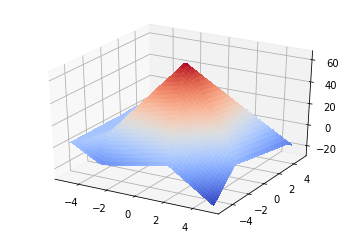

In [16]:
plot3d(X1, Y1, Zout)

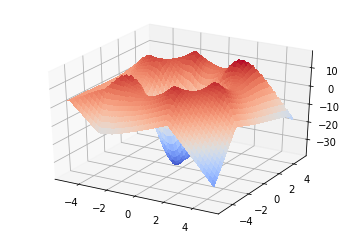

In [17]:
plot3d(X1, Y1, Zout - Z1)

## NN 2 layer

In [18]:
def model_fn_with_dense_2(features, labels, mode, params={}):
    p = params.get("p", 1)
    
    # b - batch size
    X = features['X'] # b x 1
    Y = features['Y'] # b x 1
    
    # labels -- b x 1
    
    inputs = tf.concat([X,Y], axis = 1) # b x 2
    
    out1 = tf.layers.dense(inputs=inputs, activation=tf.nn.relu, units=p)
    out2 = tf.layers.dense(inputs=out1, units=p, activation=tf.nn.relu)
    out3 = tf.layers.dense(inputs=out2, units=1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode = mode,
            predictions = out3,
            loss = None,
            train_op = None
        )
    loss = tf.losses.mean_squared_error(labels, out3)
    learning_rate = 1e-5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    global_step = tf.train.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = out3,
        loss = loss,
        train_op = train_op
    )

In [19]:
estimator = tf.estimator.Estimator(model_fn=model_fn_with_dense, params={"p": 10})
input_fn = tf.estimator.inputs.numpy_input_fn({"X": X1, "Y":Y1}, y=Z1, batch_size=5, num_epochs=100, shuffle=True)
estimator.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1216c4890>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpf3PyS4', '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpf3PyS4/model.ckpt.
INFO:tensorflow:loss = 1112.2278, step = 1
INFO:tensorflow:global_step/sec: 655.223
INFO:tensorflow:loss = 2752.1948, step = 101 (0.156 sec)
INFO:tensorflow:global_step/sec: 826.487
INFO:tensorflow:loss = 2329.1135, step 

INFO:tensorflow:global_step/sec: 1082.88
INFO:tensorflow:loss = 105.92572, step = 7501 (0.091 sec)
INFO:tensorflow:global_step/sec: 1276.6
INFO:tensorflow:loss = 1834.5013, step = 7601 (0.078 sec)
INFO:tensorflow:global_step/sec: 1242.93
INFO:tensorflow:loss = 68.99254, step = 7701 (0.081 sec)
INFO:tensorflow:global_step/sec: 1148.18
INFO:tensorflow:loss = 281.77185, step = 7801 (0.087 sec)
INFO:tensorflow:global_step/sec: 1264.3
INFO:tensorflow:loss = 194.22372, step = 7901 (0.079 sec)
INFO:tensorflow:global_step/sec: 1250.67
INFO:tensorflow:loss = 177.62999, step = 8001 (0.080 sec)
INFO:tensorflow:global_step/sec: 1304.09
INFO:tensorflow:loss = 40.025444, step = 8101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1274.86
INFO:tensorflow:loss = 1404.6299, step = 8201 (0.078 sec)
INFO:tensorflow:global_step/sec: 1240.85
INFO:tensorflow:loss = 346.99432, step = 8301 (0.081 sec)
INFO:tensorflow:global_step/sec: 1271.32
INFO:tensorflow:loss = 1046.5149, step = 8401 (0.079 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 1229.41
INFO:tensorflow:loss = 392.09357, step = 15801 (0.081 sec)
INFO:tensorflow:global_step/sec: 1296.41
INFO:tensorflow:loss = 535.9208, step = 15901 (0.077 sec)
INFO:tensorflow:global_step/sec: 1203.64
INFO:tensorflow:loss = 124.53866, step = 16001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1285.81
INFO:tensorflow:loss = 663.87463, step = 16101 (0.078 sec)
INFO:tensorflow:global_step/sec: 1273.59
INFO:tensorflow:loss = 127.412575, step = 16201 (0.079 sec)
INFO:tensorflow:global_step/sec: 1248.16
INFO:tensorflow:loss = 74.10587, step = 16301 (0.080 sec)
INFO:tensorflow:global_step/sec: 1226.65
INFO:tensorflow:loss = 144.09425, step = 16401 (0.082 sec)
INFO:tensorflow:global_step/sec: 1257.91
INFO:tensorflow:loss = 714.8713, step = 16501 (0.079 sec)
INFO:tensorflow:global_step/sec: 1261.83
INFO:tensorflow:loss = 60.07012, step = 16601 (0.079 sec)
INFO:tensorflow:global_step/sec: 1268.31
INFO:tensorflow:loss = 103.04138, step = 16701 (0.079 sec)
INF

INFO:tensorflow:loss = 950.9835, step = 24001 (0.108 sec)
INFO:tensorflow:global_step/sec: 1217.79
INFO:tensorflow:loss = 198.5039, step = 24101 (0.082 sec)
INFO:tensorflow:global_step/sec: 1007.56
INFO:tensorflow:loss = 177.49538, step = 24201 (0.099 sec)
INFO:tensorflow:global_step/sec: 1327.14
INFO:tensorflow:loss = 121.65947, step = 24301 (0.075 sec)
INFO:tensorflow:global_step/sec: 857.884
INFO:tensorflow:loss = 218.18091, step = 24401 (0.117 sec)
INFO:tensorflow:global_step/sec: 766.178
INFO:tensorflow:loss = 543.2612, step = 24501 (0.131 sec)
INFO:tensorflow:global_step/sec: 887.004
INFO:tensorflow:loss = 35.410038, step = 24601 (0.113 sec)
INFO:tensorflow:global_step/sec: 1147.71
INFO:tensorflow:loss = 1212.4946, step = 24701 (0.086 sec)
INFO:tensorflow:global_step/sec: 1295.91
INFO:tensorflow:loss = 141.04599, step = 24801 (0.077 sec)
INFO:tensorflow:global_step/sec: 1376.46
INFO:tensorflow:loss = 28.576252, step = 24901 (0.073 sec)
INFO:tensorflow:global_step/sec: 1358.6
INFO

INFO:tensorflow:global_step/sec: 1199.34
INFO:tensorflow:loss = 44.67041, step = 32301 (0.083 sec)
INFO:tensorflow:global_step/sec: 1288.58
INFO:tensorflow:loss = 1050.1611, step = 32401 (0.077 sec)
INFO:tensorflow:global_step/sec: 1309.43
INFO:tensorflow:loss = 134.05661, step = 32501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1123.66
INFO:tensorflow:loss = 60.572887, step = 32601 (0.089 sec)
INFO:tensorflow:global_step/sec: 1117.41
INFO:tensorflow:loss = 551.77106, step = 32701 (0.090 sec)
INFO:tensorflow:global_step/sec: 1091.12
INFO:tensorflow:loss = 762.0045, step = 32801 (0.092 sec)
INFO:tensorflow:global_step/sec: 1085.68
INFO:tensorflow:loss = 445.02304, step = 32901 (0.092 sec)
INFO:tensorflow:global_step/sec: 917.801
INFO:tensorflow:loss = 28.456837, step = 33001 (0.109 sec)
INFO:tensorflow:global_step/sec: 981.808
INFO:tensorflow:loss = 81.56957, step = 33101 (0.102 sec)
INFO:tensorflow:global_step/sec: 1119.73
INFO:tensorflow:loss = 44.4315, step = 33201 (0.088 sec)
INFO:

INFO:tensorflow:loss = 60.98767, step = 40501 (0.077 sec)
INFO:tensorflow:global_step/sec: 1359.58
INFO:tensorflow:loss = 264.20978, step = 40601 (0.074 sec)
INFO:tensorflow:global_step/sec: 1374.06
INFO:tensorflow:loss = 40.938297, step = 40701 (0.073 sec)
INFO:tensorflow:global_step/sec: 1371.72
INFO:tensorflow:loss = 9.780817, step = 40801 (0.073 sec)
INFO:tensorflow:global_step/sec: 1325.77
INFO:tensorflow:loss = 314.3224, step = 40901 (0.075 sec)
INFO:tensorflow:global_step/sec: 1395.65
INFO:tensorflow:loss = 62.705147, step = 41001 (0.072 sec)
INFO:tensorflow:global_step/sec: 1283.16
INFO:tensorflow:loss = 105.159096, step = 41101 (0.078 sec)
INFO:tensorflow:global_step/sec: 1267.26
INFO:tensorflow:loss = 19.438381, step = 41201 (0.079 sec)
INFO:tensorflow:global_step/sec: 1314.66
INFO:tensorflow:loss = 185.20882, step = 41301 (0.076 sec)
INFO:tensorflow:global_step/sec: 1338.63
INFO:tensorflow:loss = 99.04003, step = 41401 (0.075 sec)
INFO:tensorflow:global_step/sec: 1360.95
INF

INFO:tensorflow:global_step/sec: 1379.96
INFO:tensorflow:loss = 101.42262, step = 48801 (0.072 sec)
INFO:tensorflow:global_step/sec: 1375.95
INFO:tensorflow:loss = 148.7064, step = 48901 (0.073 sec)
INFO:tensorflow:global_step/sec: 1379.58
INFO:tensorflow:loss = 44.397346, step = 49001 (0.072 sec)
INFO:tensorflow:global_step/sec: 1312.68
INFO:tensorflow:loss = 279.98132, step = 49101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1367.07
INFO:tensorflow:loss = 33.309433, step = 49201 (0.073 sec)
INFO:tensorflow:global_step/sec: 1391.82
INFO:tensorflow:loss = 81.89378, step = 49301 (0.072 sec)
INFO:tensorflow:global_step/sec: 1371.42
INFO:tensorflow:loss = 28.420166, step = 49401 (0.073 sec)
INFO:tensorflow:global_step/sec: 1297.59
INFO:tensorflow:loss = 159.6355, step = 49501 (0.077 sec)
INFO:tensorflow:global_step/sec: 1352.91
INFO:tensorflow:loss = 103.640175, step = 49601 (0.074 sec)
INFO:tensorflow:global_step/sec: 1371.93
INFO:tensorflow:loss = 87.001175, step = 49701 (0.073 sec)
IN

In [20]:
Zgen = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([i[0] for i in Zgen]).reshape(-1,1)
estimator.evaluate(input_fn=predict_input_fn)

INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpf3PyS4/model.ckpt-50001
INFO:tensorflow:Starting evaluation at 2018-01-25-09:26:04
INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpf3PyS4/model.ckpt-50001
INFO:tensorflow:Finished evaluation at 2018-01-25-09:26:04
INFO:tensorflow:Saving dict for global step 50001: global_step = 50001, loss = 122.110405


{'global_step': 50001, 'loss': 122.110405}

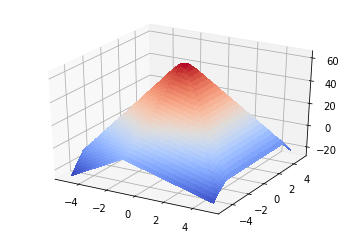

In [21]:
plot3d(X1, Y1, Zout)

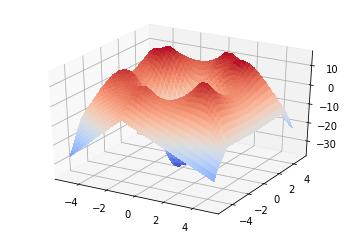

In [22]:
plot3d(X1, Y1, Zout - Z1)